https://www.kaggle.com/fournierp/captcha-version-2-images

The images are 5 letter words that can contain numbers. The images have had noise applied to them (blur and a line). They are 200 x 50 PNGs.

In [23]:
from google.colab import drive
import os
import matplotlib.pyplot as plt
from tensorflow import keras
import cv2
import numpy as np

# Loading the Dataset

In [24]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Colab Notebooks/Machine Learning Projects/(Kaggle) API Token"

In [26]:
%cd /content/drive/My Drive/Colab Notebooks/Machine Learning Projects/(Kaggle) Captcha Slover/Dataset

/content/drive/My Drive/Colab Notebooks/Machine Learning Projects/(Kaggle) Captcha Slover/Dataset


In [27]:
#!kaggle datasets download -d fournierp/captcha-version-2-images

In [28]:
#!unzip 'captcha-version-2-images.zip'

# Inspecting the Dataset

Number of Images

In [29]:
data_path = 'samples/samples'
len(os.listdir(path=data_path))

1070

Let's Look at Some Sample Image

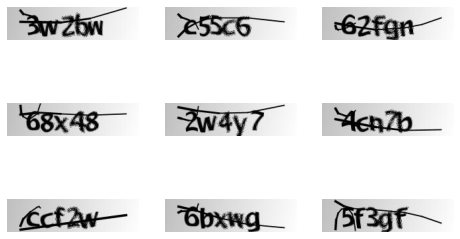

In [30]:
images = os.listdir(data_path)
sample_images = images[-9:]
fig, ax = plt.subplots(3, 3, figsize=(8, 5))
for i in range(9):
  img = cv2.imread(str(data_path + '/' + sample_images[i]))
  ax[i//3, i%3].imshow(img)
  ax[i//3, i%3].axis('off')

# Data (Image Preprocessing) with OpenCV

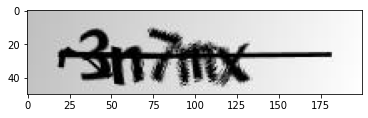

In [31]:
first_img = cv2.imread(data_path + '/' + images[154])
plt.imshow(first_img)

Thresholding -> Black and White

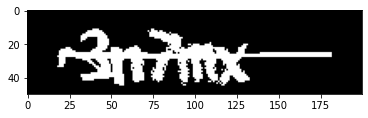

In [32]:
ret, threshold = cv2.threshold(first_img, 127, 255, cv2.THRESH_BINARY_INV)
plt.imshow(threshold, cmap='gray')

Reduce noise with median blue (see 'm' and 'x')

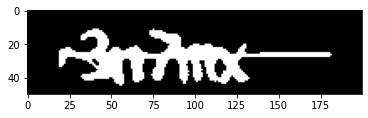

In [33]:
blurred = cv2.medianBlur(threshold, 3)
plt.imshow(blurred, cmap='gray')

Remove the line that tranverses the image with erosion and dilation

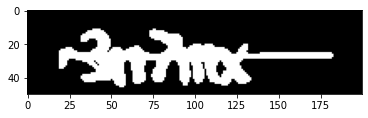

In [34]:
kernel = np.ones([2, 2], np.uint8)
dilate1 = cv2.dilate(blurred, kernel, iterations=1)
plt.imshow(dilate1, cmap='gray')

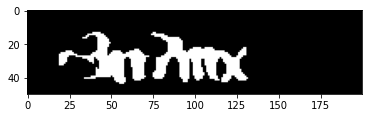

In [35]:
kernel = np.ones([5, 1], np.uint8)
erode1 = cv2.erode(dilate1, kernel, iterations=1)
plt.imshow(erode1, cmap='gray')

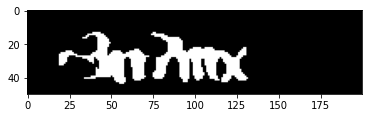

In [36]:
kernel = np.ones([1, 1], np.uint8)
erode2 = cv2.erode(erode1, kernel, iterations=1)
plt.imshow(erode2, cmap='gray')

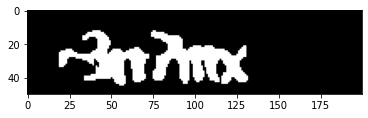

In [37]:
kernel = np.ones([3, 1], np.uint8)
dilate2 = cv2.dilate(erode2, kernel, iterations=1)
plt.imshow(dilate2, cmap='gray')

Find Contours

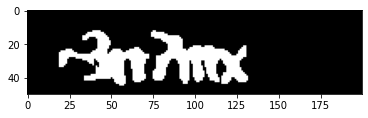

In [38]:
binary = cv2.cvtColor(dilate2, cv2.COLOR_RGB2GRAY)
plt.imshow(binary, cmap='gray')

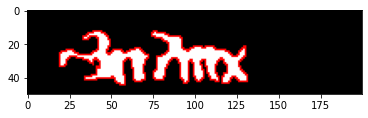

In [39]:
contours, hierachy = cv2.findContours(binary, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
draw_contours = cv2.drawContours(cv2.cvtColor(binary, cv2.COLOR_GRAY2RGB), contours, -1, (255, 0, 0), 1, cv2.LINE_4)
plt.imshow(draw_contours, cmap='gray')

Draw bounding box for each contour

In [40]:
bounding_box = [cv2.boundingRect(contour) for contour in contours]

# Split Training and Testing Set

Extract labels from image name

In [77]:
image_path = [data_path + '/' + images[i] for i in range(len(images))]
label = [images[i].split('.png')[0] for i in range(len(images))]
label = [label[i].split('.jpg')[0] for i in range(len(label))]

Now we have a list containing image path and label

In [90]:
dataset = list(zip(image_path, label))
dataset[:5]

[('samples/samples/6dmx7.png', '6dmx7'),
 ('samples/samples/en4n4.png', 'en4n4'),
 ('samples/samples/4ycex.png', '4ycex'),
 ('samples/samples/4c8n8.png', '4c8n8'),
 ('samples/samples/2npg6.png', '2npg6')]

Split 90% Training and 10% Testing Set

In [92]:
(1070*0.9), (10)

963.0

In [91]:
len(dataset)

1070

# Build and Train Model

In [41]:
#keras.models.sequential()

AttributeError: ignored

References:

https://www.kaggle.com/vykstorm/extracting-words-from-images-with-opencv-part-2

https://www.kaggle.com/aakashnain/building-a-captcha-ocr-in-tf2-0